In [103]:
import csv
import itertools

def statFromFile(inFile):
    randLog = csv.reader(open(inFile, newline=''), delimiter=',', quotechar='"')
    window = list()
    WINDOW_SIZE = 5
    stat = {}
    coms = {}
    for row in randLog:
        if len(row) == 3:
            com = row[0][4:5]+row[1]
            
            if coms.get(com,0) == 0:
                coms.update({com : 1})
                
            window.append(com)
            
            if len(window) == WINDOW_SIZE:
                val5 = "->".join(window)
                #stat.update({'asdf',1})
                stat.update({val5 : stat.get(val5,0) + 1})
                window.pop(0)

    return stat

print("Run conditions: 3 nodes, 200 clients, 50 max number, 10% probability to lose packet, 3h run")
print("15 combinations: 3 nodes * (4 com + 1 lose packet)")

rndFullRes = statFromFile('rand5_node3_client200_request50_X10_5h.log')
rndRes = sorted(rndFullRes.values(),reverse=True)

expFullRes = statFromFile('visited_expN5_node3_client40_r50_X10_5h.log')
expRes = sorted(expFullRes.values(),reverse=True)




Run conditions: 3 nodes, 200 clients, 50 max number, 10% probability to lose packet, 3h run
15 combinations: 3 nodes * (4 com + 1 lose packet)


In [160]:
allComb = 15**5
print('RND len: {}, from: {}, coverage: {:.2f}%'.format(len(rndRes), allComb, len(rndRes)/allComb*100))
print('EXP len: {}, from: {}, coverage: {:.2f}%'.format(len(expRes), allComb, len(expRes)/allComb*100))
print("")

mergedRes = []
sumRndBased = 0.0
sumExpBased = 0.0

for v in rndFullRes.items():
    exVal = expFullRes.get(v[0],0)
    mergedRes.append([v[0],v[1],exVal])
    sumExpBased += 1 if v[1] < exVal else exVal/v[1]
    if (exVal > 0) :
        sumRndBased += 1 if exVal < v[1] else v[1]/exVal

topVals100 = sorted(mergedRes, key=lambda x: x[1],reverse=True)

print("RESULT: visited routes have rather good coverage of RND rows: {:.2f}%".format(sumExpBased/len(rndFullRes)*100))
print("{:<60} {:<5} {:<5}".format('5chain sorted by RND descending', 'rnd', 'exp'))
for v in topVals100[0:20]:
    print("{:<60} {:<5} {:<5}".format(v[0],v[1],v[2]))

topVals100 = sorted(mergedRes, key=lambda x: x[2],reverse=True)

print("\nRESULT: but RND does not cover visited as good {:.2f}%".format(sumRndBased/len(rndFullRes)*100))
print("{:<60} {:<5} {:<5}".format('5chain sorted by RND descending', 'rnd', 'exp'))
for v in topVals100[0:20]:
    print("{:<60} {:<5} {:<5}".format(v[0],v[1],v[2]))

rndTopVals100 = sorted(rndFullRes.items(), key=lambda x: x[1],reverse=True)[0:10]
expTopVals100 = sorted(expFullRes.items(), key=lambda x: x[1],reverse=True)[0:10]



RND len: 16942, from: 759375, coverage: 2.23%
EXP len: 15769, from: 759375, coverage: 2.08%

RESULT: visited routes have rather good coverage of RND rows: 27.95%
5chain sorted by RND descending                              rnd   exp  
1abort->1vote->1abort->1vote->1abort                         342   95   
2abort->2abort->2abort->2abort->2abort                       337   147  
1vote->1abort->1vote->1abort->1vote                          230   54   
1vote->1abort->1abort->1vote->1abort                         163   109  
1abort->1abort->1abort->1abort->1abort                       162   118  
1abort->1vote->1abort->1abort->1vote                         158   66   
1abort->1vote->1abort->1abort->1abort                        158   91   
1vote->1abort->1vote->1abort->1abort                         156   91   
1abort->1abort->1vote->1abort->1vote                         156   51   
1abort->1abort->1vote->1abort->1abort                        155   84   
3abort->3abort->3abort->3abort->3ab

TypeError: list indices must be integers or slices, not tuple

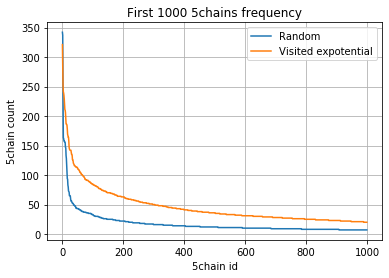

In [97]:
import matplotlib.pyplot as plt

plt.title("First 1000 5chains frequency")
plt.xlabel("5chain id")
plt.ylabel("5chain count")
plt.plot(rndRes[0:1000], label="Random")
plt.plot(expRes[0:1000], label="Visited expotential")
plt.legend()
plt.grid(True)
plt.show()

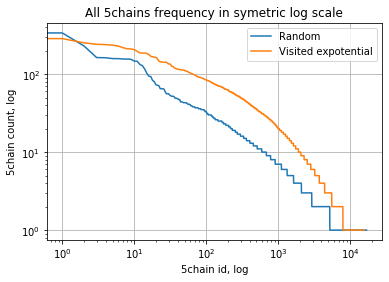

In [101]:
plt.title("All 5chains frequency in symetric log scale")
plt.xlabel("5chain id")
plt.ylabel("5chain count")
plt.yscale('log')
plt.xscale('log')
plt.plot(rndRes, label="Random")
plt.plot(expRes, label="Visited expotential")
plt.legend()
plt.grid(True)
plt.show()